In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

torch.set_printoptions(linewidth=150)

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
image, label = train_set[0]
image.shape


torch.Size([1, 28, 28])

In [6]:
in_features = image.numel()
in_features

784

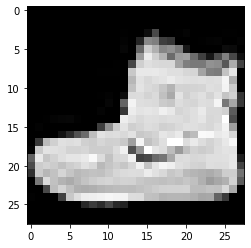

In [7]:
plt.imshow(image.squeeze(), cmap='gray')

In [8]:
image.squeeze().shape

torch.Size([28, 28])

In [9]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
out_features = math.floor(in_features / 2)
out_features

392

In [12]:
out_classes = len(train_set.classes)
out_classes

10

In [14]:
network1 = nn.Sequential(
    nn.Flatten(start_dim=1)
    ,nn.Linear(in_features, out_features)
    ,nn.Linear(out_features, out_features)
)
network1

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=392, bias=True)
)

In [15]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [17]:
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1))
    ,('hidden', nn.Linear(in_features, out_features))
    ,('output', nn.Linear(out_features, out_features))
])
network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=392, bias=True)
)

In [19]:
network1(image)

tensor([[ 2.3567e-01, -1.3974e-01,  1.5715e-01, -1.5381e-01, -6.4997e-02,  3.8415e-02, -1.4038e-02,  7.9533e-02,  5.7755e-02, -1.8844e-01,
          1.5810e-01,  7.5811e-02,  8.0576e-02, -1.4307e-01, -2.6038e-01,  2.4963e-01, -1.2457e-01, -1.7765e-01,  3.6099e-01,  2.3029e-01,
         -1.4245e-02, -3.2219e-01, -1.3194e-01, -1.7607e-01,  2.0533e-02, -3.5111e-02, -1.9422e-01,  3.2253e-02,  3.8104e-02, -1.6074e-01,
          6.2205e-02, -6.5182e-02,  6.3683e-02, -3.5957e-01,  2.2925e-01,  1.2821e-01, -5.1864e-03, -1.5291e-01, -2.3257e-02, -9.8839e-04,
          1.2745e-01,  2.0448e-02, -9.1791e-03, -4.9513e-02,  1.2806e-01, -2.2485e-01,  5.9529e-02, -1.0564e-01,  1.7081e-01,  3.0380e-02,
          5.0684e-02,  6.3721e-02, -1.7813e-01, -8.7285e-02, -1.0975e-01, -5.4612e-02, -1.8418e-01, -2.1306e-01, -1.8548e-01, -1.7315e-01,
          3.1059e-01, -9.9985e-02,  4.9290e-02, -1.7674e-01, -1.5294e-01, -2.3353e-02,  1.3175e-01,  1.7643e-01,  2.4459e-01, -4.8258e-02,
          2.7961e-01, -4.88

In [20]:
torch.manual_seed(50)
# maual_seed 随机初始化的weight相同
network1 = nn.Sequential(
    nn.Flatten(start_dim=1)
    ,nn.Linear(in_features, out_features)
    ,nn.Linear(out_features, out_features)
)

torch.manual_seed(50)
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1))
    ,('hidden', nn.Linear(in_features, out_features))
    ,('output', nn.Linear(out_features, out_features))
])
network2 = nn.Sequential(layers)

In [22]:
network1(image)==network2(image)

tensor([[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

In [25]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim=1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_features))
network3

Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=392, bias=True)
)

In [26]:
network1(image) == network3(image)

tensor([[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

Build a Network Class

In [27]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, t):
        t = t 
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = t.reshape(-1, 12*4*4)  # t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        
        t = F.relu(self.fc2(t))
        
        t = self.out(t)
        return t
        

In [29]:
torch.manual_seed(50)
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [31]:
torch.manual_seed(50)
sequential = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [32]:
network(image), sequential(image)

(tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>))

# BN

In [40]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
        # normalize
        
    ])
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

In [39]:
train_set_normal = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
        # normalize
        , transforms.Normalize((0.2860,), (0.3530,))
    ])
)

In [41]:
import time
import pandas as pd
from IPython.display import clear_output
import json
class RunManager():
    def __init__(self):
        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None
        
        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None
        
        self.network = None
        self.loader = None
        self.tb = None
        
    def begin_run(self, run, network, loader):
        self.run_start_time = time.time()
        
        self.run_params = run
        self.run_count += 1
        
        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f'-{run}')
        
        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)
        
        self.tb.add_image('images', grid)
        self.tb.add_graph(self.network, images.to(getattr(run, 'device','cpu')))
        
    def end_run(self):
        self.tb.close()
        self.epoch_count = 0
        
    def begin_epoch(self):
        self.epoch_start_time = time.time()
        
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0
    
    def end_epoch(self):
        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time
        
        loss = self.epoch_loss/len(self.loader.dataset)
        accuracy = self.epoch_num_correct/len(self.loader.dataset)
        
        self.tb.add_scalar('Loss', loss, self.epoch_count)
        self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)
        
        for name, param in self.network.named_parameters():
            self.tb.add_histogram(name, param, self.epoch_count)
            self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
            
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results["loss"] = loss
        results["accuracy"] = accuracy
        results["epoch duration"] = epoch_duration
        results["run duration"] = run_duration
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient='columns')

        clear_output(wait=True)
        display(df)
    
    def track_loss(self, loss):
        self.epoch_loss += loss.item()*self.loader.batch_size
    
    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)
    
    @torch.no_grad()
    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()
    
    def save(self, fileName):
        pd.DataFrame.from_dict(
            self.run_data,
            orient='columns').to_csv(f'{fileName}.csv')
        with open(f'{fileName}.json','w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [42]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product
from torch.utils.tensorboard import SummaryWriter
class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run', params.keys())
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
        return runs
    
    
    
trainsets = {
    'not_noraml': train_set,
    'normal': train_set_normal
}


In [34]:
torch.manual_seed(50)
network1 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [35]:
torch.manual_seed(50)
network2 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.BatchNorm2d(6)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.BatchNorm1d(120)
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [53]:
networks = {
    'no_batch_norm': network1
    ,'batch_norm': network2
}

In [54]:
params = OrderedDict(
    lr = [.01]
    , batch_size = [1000]
    , num_workers = [1]
    , device = ['cuda']
    , trainsets = ['normal']
    , shuffle = [True]
    , network = list(networks.keys())
)

In [55]:
# 使用RunManager和RunBuilder类可以使得程序更易扩展
import torch.optim as optim
m = RunManager()
for run in RunBuilder.get_runs(params):
    
    device = torch.device(run.device)
    network = networks[run.network].to(device)
    loader = torch.utils.data.DataLoader(trainsets[run.trainsets], batch_size=run.batch_size, shuffle=run.shuffle, num_workers=run.num_workers)
    optimizer = optim.Adam(network.parameters(), lr=run.lr)
    
    m.begin_run(run, network, loader)
    for epoch in range(1):
        m.begin_epoch()
        for batch in loader:
#             images, labels = batch
            images = batch[0].to(device)
            labels = batch[1].to(device)
            preds = network(images)
            loss = F.cross_entropy(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            m.track_loss(loss)
            m.track_num_correct(preds, labels)
            
        m.end_epoch()
    m.end_run()
m.save('resuls')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainsets,shuffle,network
0,1,1,0.497986,0.819650,5.510418,6.089131,0.01,1000,1,cuda,normal,True,no_batch_norm
1,2,1,0.338546,0.874667,5.359788,5.944750,0.01,1000,1,cuda,normal,True,batch_norm
